# 案例：2009年英国国会议员开支丑闻


MPs expenses scandal 

https://github.com/data-journalism/data-journalism.github.io/discussions/54


In [74]:
import pandas as pd

import pylab as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.
plt.style.use('ggplot')


In [1]:
ls './data/'

MPs' expenses claims, Jul-Dec, 2009.xlsx
data.js*


In [4]:
df = pd.read_excel("./data/MPs' expenses claims, Jul-Dec, 2009.xlsx")
df.head()

,Name of member,Allowance Type,Expenditure Type,Date,"Amount, £"
0,Adam Afriyie,Office running costs (IEP/AOE),Incidentals,2009-07-03 00:00:00,111.09
1,Adam Afriyie,Office running costs (IEP/AOE),Incidentals,2009-11-05 00:00:00,111.09
2,Adam Afriyie,Office running costs (IEP/AOE),Incidentals,2009-11-05 00:00:00,51.75
3,Adam Holloway,Communications Expenditure,Delivery charges,2009-11-10 00:00:00,258.22
4,Adam Holloway,Communications Expenditure,Delivery charges,2009-12-10 00:00:00,879.66


In [7]:
df.columns

Index(['Name of member', 'Allowance Type', 'Expenditure Type', 'Date',
       'Amount, £'],
      dtype='object')

In [5]:
len(df)

38925

In [6]:
df.describe()

,Name of member,Allowance Type,Expenditure Type,Date,"Amount, £"
count,38925,38925,38925,38925,38925
unique,643,5,39,140,14441
top,Danny Alexander,Office running costs (IEP/AOE),Incidentals,2009-12-21 00:00:00,50
freq,173,25787,8672,828,857


## 清洗数据

In [61]:
df[df['Amount, £']=='Amount']

,Name of member,Allowance Type,Expenditure Type,Date,"Amount, £"
27710,Member Name,Allowance Type,Expenditure Type,Date,Amount


In [62]:
df = df[df['Amount, £']!='Amount']


In [63]:
df[df['Name of member']=='John Randall']

,Name of member,Allowance Type,Expenditure Type,Date,"Amount, £"
22221,John Randall,Office running costs (IEP/AOE),Accommodation costs,2009-08-20 00:00:00,-2134
22222,John Randall,Office running costs (IEP/AOE),Other equipment lease,2009-07-01 00:00:00,25.08


In [64]:
df['Amount, £'] = [abs(float(i)) for i in df['Amount, £']]

## 描述数据

In [11]:
df[['Name of member', 'Amount, £']].groupby("Name of member").agg('sum')

,"Amount, £"
Name of member,
Adam Afriyie,273.93
Adam Holloway,7415.06
Adam Ingram,18578.90
Adam Price,7874.73
Adrian Bailey,10668.61
...,...
William Hague,7370.98
William McCrea,24689.34
William Rennie,27257.33


In [71]:
dat1 = df[['Name of member', 'Amount, £']].groupby("Name of member").agg('sum')
dat1 = dat1.sort_values(by=['Amount, £'], ascending = False)
dat1[:10]

,"Amount, £"
Name of member,
Graham Allen,42753.53
Michael Foster,39999.69
Mark Hunter,34779.11
Gordon Banks,34471.90
Lynda Waltho,34288.55
Joan Humble,33395.89
Phil Wilson,33031.23
Barbara Follett,32861.14
Sian James,32495.32


In [72]:
dat1['Rank'] = range(1, len(dat1)+1)

In [73]:
dat1[:10]

,"Amount, £",Rank
Name of member,,
Graham Allen,42753.53,1
Michael Foster,39999.69,2
Mark Hunter,34779.11,3
Gordon Banks,34471.90,4
Lynda Waltho,34288.55,5
Joan Humble,33395.89,6
Phil Wilson,33031.23,7
Barbara Follett,32861.14,8
Sian James,32495.32,9


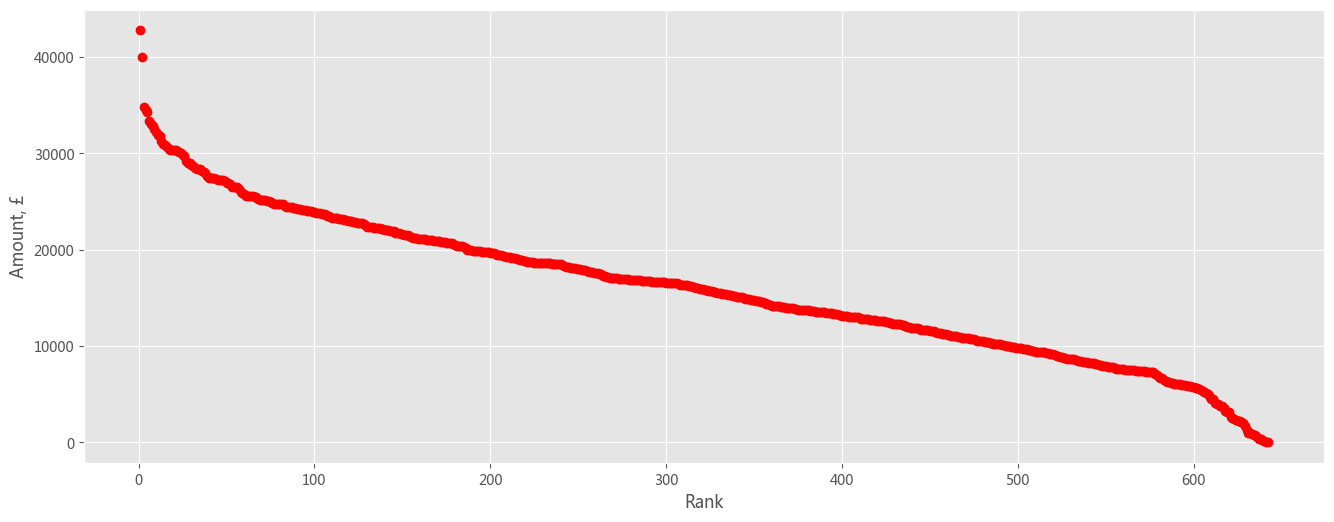

In [83]:
plt.figure(figsize =(16, 6), dpi = 100)

plt.plot(dat1['Rank'], dat1['Amount, £'], 'ro')
# plt.yscale('log')
# plt.xscale('log')

plt.xlabel('Rank')
plt.ylabel('Amount, £')
plt.show()

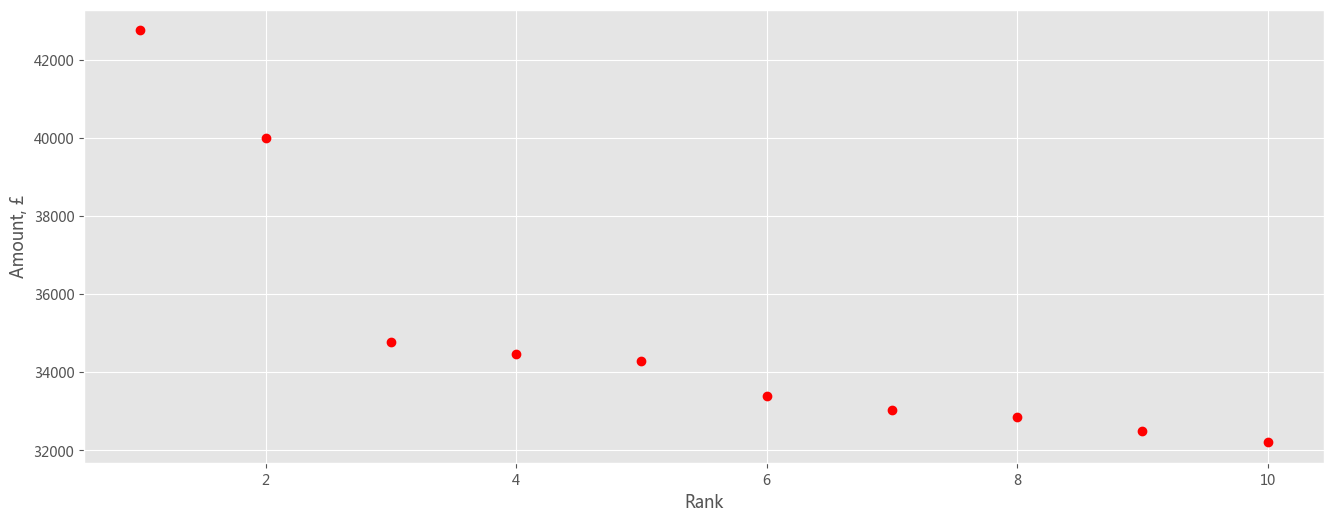

In [84]:
plt.figure(figsize =(16, 6), dpi = 100)

dat10 = dat1[:10]
plt.plot(dat10['Rank'], dat10['Amount, £'], 'ro')
# plt.yscale('log')
# plt.xscale('log')

plt.xlabel('Rank')
plt.ylabel('Amount, £')
plt.show()

In [87]:
dat2 = df[['Allowance Type', 'Amount, £']].groupby("Allowance Type").agg('sum')
dat2 = dat2.sort_values(by=['Amount, £'], ascending = False)
dat2

,"Amount, £"
Allowance Type,
Office running costs (IEP/AOE),4561001.11
Cost of staying away from the main home (ACA/PAAE),3160432.72
Communications Expenditure,2510511.02
Staffing non-payroll,24414.17


In [93]:
dat3 = df[['Expenditure Type', 'Amount, £']].groupby("Expenditure Type").agg('sum')
dat3 = dat3.sort_values(by=['Amount, £'], ascending = False)
dat3

,"Amount, £"
Expenditure Type,
Accommodation costs,1809184.32
Publications,1097722.44
Mortgage interest,1056568.92
Delivery charges,1019891.50
Rent,969231.40
Incidentals,806222.41
Telephones,677887.23
Other household costs,463874.76
Subsistence,373680.38


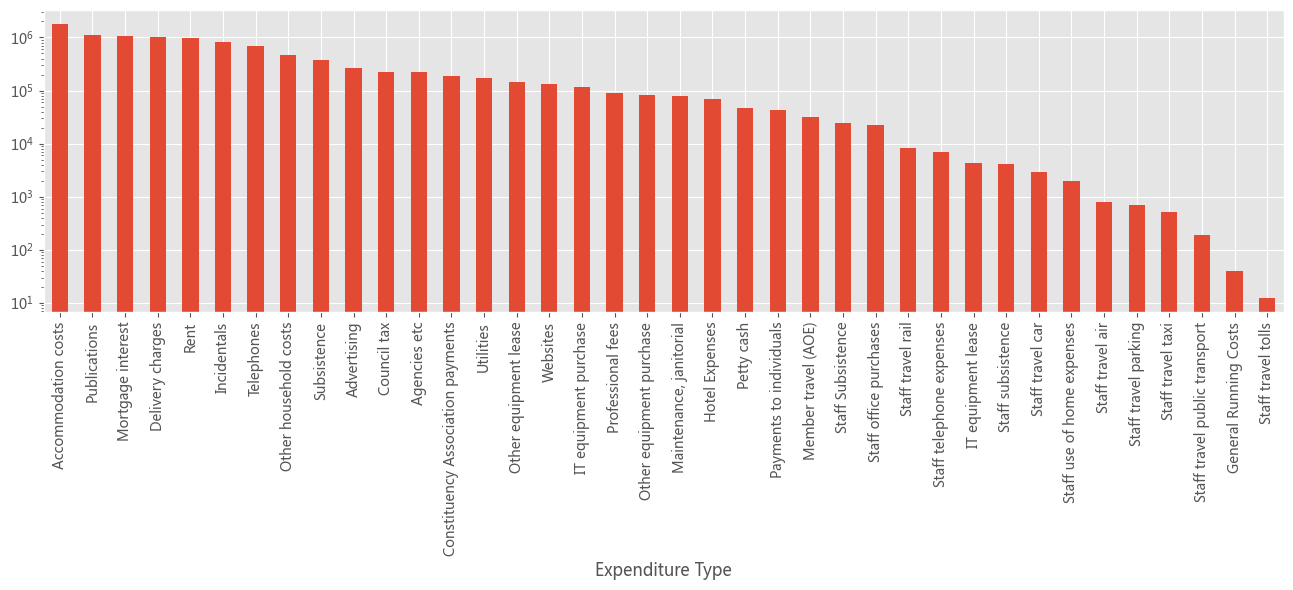

In [96]:
plt.figure(figsize =(16, 4), dpi = 100)
dat3['Amount, £'].plot(kind = 'bar')
plt.yscale('log')
plt.show()

## 桑基图

In [104]:
from pyecharts import options as opts
from pyecharts.charts import Sankey

nodes = [
    {"name": "category1"},
    {"name": "category2"},
    {"name": "category3"},
    {"name": "category4"},
    {"name": "category5"},
    {"name": "category6"},
]

links = [
    {"source": "category1", "target": "category2", "value": 10},
    {"source": "category2", "target": "category3", "value": 15},
    {"source": "category3", "target": "category4", "value": 20},
    {"source": "category5", "target": "category6", "value": 25},
]
c = (
    Sankey()
    .add(
        "sankey",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Sankey-基本示例"))
    #.render("sankey_base.html")
    .render_notebook()
)

c

In [118]:
dat4 = df[['Allowance Type','Expenditure Type', 'Amount, £']].groupby(['Expenditure Type', 'Allowance Type'],  as_index = False).agg('sum')
dat4 = dat4.sort_values(by=['Amount, £'], ascending = False)
dat4

,Expenditure Type,Allowance Type,"Amount, £"
0,Accommodation costs,Office running costs (IEP/AOE),1809184.32
20,Publications,Communications Expenditure,1097722.44
13,Mortgage interest,Cost of staying away from the main home (ACA/P...,1056568.92
5,Delivery charges,Communications Expenditure,1019891.50
21,Rent,Cost of staying away from the main home (ACA/P...,969231.40
10,Incidentals,Office running costs (IEP/AOE),806222.41
35,Telephones,Office running costs (IEP/AOE),677887.23
16,Other household costs,Cost of staying away from the main home (ACA/P...,463874.76
34,Subsistence,Cost of staying away from the main home (ACA/P...,373680.38
1,Advertising,Communications Expenditure,261207.10


In [140]:
nodes = dat4['Allowance Type'].unique().tolist() + dat4['Expenditure Type'].unique().tolist()
nodes = [{'name': i} for i in nodes]
links = [{'source': dat4['Allowance Type'][i], 'target': dat4['Expenditure Type'][i], 'value': dat4['Amount, £'][i]}  for i in dat4.index]

In [144]:
from pyecharts import options as opts
from pyecharts.charts import Sankey

s = (
    Sankey()
    .add(
        "sankey",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
        label_opts=opts.LabelOpts(position="right"),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Sankey Graph of UK MPS"))
)

s.render_notebook()

In [145]:
s.render("sankey_mps.html")

'/Users/datalab/github/data-journalism.github.io/notebook/sankey_mps.html'

https://data-journalism.github.io/notebook/sankey_mps.html